# PREDICTING GROCERY SALES FOR FAVORITA STORE USING MACHINE LEARNING

![](https://camo.githubusercontent.com/57009dd1178856304faa1da0112084f820a3851e79024d8cef6f1b9afac0607f/68747470733a2f2f696d616765732e756e73706c6173682e636f6d2f70686f746f2d313530363631373536343033392d3266336236353062373031303f69786c69623d72622d312e322e3126697869643d65794a6863484266615751694f6a45794d446439266175746f3d666f726d6174266669743d63726f7026773d3133353026713d3830)

## Introduction

[Corporación Favorita](https://www.corporacionfavorita.com/) is an Ecuadorian conglomerate of self-service stores, real estate investments, electricity generation, food production and basic necessities, commerce, and hardware. The company is present in Ecuador, Peru, Paraguay and Panama.
Supermarkets La Favorita CA was established on November 26, 1957. This was the first self-service supermarket in Ecuador.

In this project, we will use time-series forecasting to forecast store sales on data from Corporación Favorita, for the thousands of product families sold at Favorita stores. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers.

For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction.

We're using this dataset from Kaggle.

Dataset Source: https://www.kaggle.com/competitions/store-sales-time-series-forecasting

## How to run the code
This tutorial is an executable Jupyter notebook hosted on Jovian. You can run this tutorial and experiment with the code examples in a couple of ways: using free online resources (recommended) or on your computer.

**Option 1: Running using free online resources (1-click, recommended)**

The easiest way to start executing the code is to click the Run button at the top of this page and select Run on Binder. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on Google Colab or Kaggle to use these platforms.

**Option 2: Running on your computer locally**

To run the code on your computer locally, you'll need to set up Python, download the notebook and install the required libraries. We recommend using the Conda distribution of Python. Click the Run button at the top of this page, select the Run Locally option, and follow the instructions.

## Dataset Description

**File Descriptions and Data Field Information**

- **train.csv**

 - store_nbr: identifies the store at which the products are sold.
 - family: identifies the type of product sold.
 - sales: gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
 - onpromotion: gives the total number of items in a product family that were being promoted at a store at a given date.

- **test.csv**

 - The test data, having the same features as the training data. We will predict the target sales for the dates in this file.
 - The dates in the test data are for the 15 days after the last date in the training data.

- **sample_submission.csv**
 - A sample submission file in the correct format.

- **stores.csv**

 - Store metadata, including city, state, type, and cluster.
 - cluster is a grouping of similar stores.

- **oil.csv**

 - Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

- **holidays_events.csv**

 - Holidays and Events, with metadata
 - NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
 - Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

- Additional Notes Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this. A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.



## Problem Identification

Sales is a labeled continuous numeric feature. Hence, this is an application of Supervised ML, specifically, it is a regression problem.

## Evaluation Metric

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as:

$$RMSLE = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2}$$

where:

 $n$ is the total number of instances,

 $\hat{y}_i$ is the predicted value of the target for instance (i),

 ${y}_i$ is the actual value of the target for instance (i)

 $log$ is the natural logarithm.

## Download the Dataset

### Install and Import Required Libraries

In [1]:
!pip install --upgrade pandas "dask[complete]" --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.4/980.4 kB 42.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [2]:
!pip install opendatasets seaborn matplotlib plotly scikit-learn xgboost lightgbm --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 11.1 MB/s eta 0:00:00


In [3]:
# Import library to download data from Kaggle
import opendatasets as od

import os
import random

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Visualisation libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline

# Configuring styles
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [5]:
#Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import random
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

### Loading Data

In [6]:
dataset_url = 'https://www.kaggle.com/competitions/store-sales-time-series-forecasting'

In [7]:
od.download(dataset_url)

100%|██████████| 21.4M/21.4M [00:00<00:00, 34.8MB/s]



Extracting archive ./store-sales-time-series-forecasting/store-sales-time-series-forecasting.zip to ./store-sales-time-series-forecasting


In [8]:
data_dir = "store-sales-time-series-forecasting"

## View Dataset Files

In [9]:
os.listdir(data_dir)

['train.csv',
 'test.csv',
 'oil.csv',
 'transactions.csv',
 'stores.csv',
 'sample_submission.csv',
 'holidays_events.csv']

In [10]:
train_df = pd.read_csv(data_dir+'/train.csv')
test_df = pd.read_csv(data_dir+'/test.csv')
transactions_df = pd.read_csv(data_dir+'/transactions.csv')
stores_df = pd.read_csv(data_dir+'/stores.csv')
oil_df = pd.read_csv(data_dir+'/oil.csv')
holidays_df = pd.read_csv(data_dir+'/holidays_events.csv')

In [11]:
print('Training dataset length:', len(train_df))
print('Test dataset length:', len(test_df))
print('Transactions dataset length:', len(transactions_df))
print('Stores dataset length:', len(stores_df))
print('Oil dataset length:', len(oil_df))
print('Holidays events dataset length:', len(holidays_df))

Training dataset length: 3000888
Test dataset length: 28512
Transactions dataset length: 83488
Stores dataset length: 54
Oil dataset length: 1218
Holidays events dataset length: 350


In [12]:
print('Training dataset Shape:', (train_df.shape))
print('Test dataset Shape:', (test_df.shape))
print('Transactions dataset Shape:', (transactions_df.shape))
print('Stores dataset Shape:', (stores_df.shape))
print('Oil dataset Shape:', (oil_df.shape))
print('Holidays events dataset Shape:', (holidays_df.shape))

Training dataset Shape: (3000888, 6)
Test dataset Shape: (28512, 5)
Transactions dataset Shape: (83488, 3)
Stores dataset Shape: (54, 5)
Oil dataset Shape: (1218, 2)
Holidays events dataset Shape: (350, 6)


In [13]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0
1,1,2013-01-01,1,BABY CARE,0.00,0
2,2,2013-01-01,1,BEAUTY,0.00,0
3,3,2013-01-01,1,BEVERAGES,0.00,0
4,4,2013-01-01,1,BOOKS,0.00,0


In [14]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


The dataset has 3 million+ rows and 6 columns in training data and 28k+ rows and 5 columns in test data


We will use only 1% of the training data to train the model.

In [15]:
sample_fraction = 0.1

def skip_row(row_idx):
  if row_idx == 0:
    return False
  return random.random() > sample_fraction

# Loading the data with skip rows
random.seed(42)
train_df = pd.read_csv(data_dir+'/train.csv',
                 skiprows=skip_row)

## Explore the Dataset

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300730 entries, 0 to 300729
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           300730 non-null  int64  
 1   date         300730 non-null  object 
 2   store_nbr    300730 non-null  int64  
 3   family       300730 non-null  object 
 4   sales        300730 non-null  float64
 5   onpromotion  300730 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 13.8+ MB


In [17]:
train_df.describe()

,id,store_nbr,sales,onpromotion
count,"300,730.00","300,730.00","300,730.00","300,730.00"
mean,"1,501,977.07",27.53,359.91,2.61
std,"865,581.59",15.61,"1,112.44",12.26
min,1.00,1.00,0.00,0.00
25%,"753,795.25",14.00,0.00,0.00
50%,"1,503,074.50",28.00,11.00,0.00
75%,"2,251,658.25",41.00,195.24,0.00
max,"3,000,871.00",54.00,"76,090.00",720.00


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [19]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [20]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [21]:
transactions_df.describe()

,store_nbr,transactions
count,"83,488.00","83,488.00"
mean,26.94,"1,694.60"
std,15.61,963.29
min,1.00,5.00
25%,13.00,"1,046.00"
50%,27.00,"1,393.00"
75%,40.00,"2,079.00"
max,54.00,"8,359.00"


In [22]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [23]:
oil_df.describe()

,dcoilwtico
count,"1,175.00"
mean,67.71
std,25.63
min,26.19
25%,46.41
50%,53.19
75%,95.66
max,110.62


In [24]:
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [25]:
train_df.family.nunique(), train_df.family.unique()

(33,
 array(['BABY CARE', 'CLEANING', 'DELI', 'GROCERY I', 'LADIESWEAR',
        'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'DAIRY', 'FROZEN FOODS',
        'LIQUOR,WINE,BEER', 'MAGAZINES', 'POULTRY', 'PERSONAL CARE',
        'SEAFOOD', 'BEAUTY', 'BOOKS', 'AUTOMOTIVE', 'HOME CARE',
        'LINGERIE', 'BREAD/BAKERY', 'SCHOOL AND OFFICE SUPPLIES', 'EGGS',
        'CELEBRATION', 'GROCERY II', 'HOME AND KITCHEN I', 'HARDWARE',
        'MEATS', 'PREPARED FOODS', 'HOME AND KITCHEN II',
        'HOME APPLIANCES', 'BEVERAGES', 'PRODUCE', 'LAWN AND GARDEN'],
       dtype=object))

In [26]:
train_df.store_nbr.nunique()

54

In [27]:
stores_df[['city','state','type','cluster']].nunique(), stores_df.type.unique()

(city       22
 state      16
 type        5
 cluster    17
 dtype: int64,
 array(['D', 'B', 'C', 'E', 'A'], dtype=object))

We find out that there are 33 product families in 54 stores across 22 cities situated in 16 states. The stores are categorized into 5 types as 'A', 'B', 'C', 'D', and 'E'. Also there are 17 clusters i.e, grouping of similar stores.

### Filling missing values in oil_df

In [28]:
def fill_nan_with_mean(df, column_name):
    values = df[column_name].values
    is_nan = np.isnan(values)
    filled_values = values.copy()

    for i in range(1, len(filled_values)-1):
        if np.isnan(filled_values[i]):
            prev_val = filled_values[i-1]
            next_val = filled_values[i+1]
            if not np.isnan(prev_val) and not np.isnan(next_val):
                filled_values[i] = (prev_val + next_val) / 2

    df[column_name] = filled_values
    return df

In [29]:
fill_nan_with_mean(oil_df, 'dcoilwtico')

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [30]:
oil_df[oil_df.dcoilwtico.isna()]

,date,dcoilwtico
0,2013-01-01,NaN
1174,2017-07-03,NaN
1175,2017-07-04,NaN


Still we have 3 nan(s) , filling them manually

In [31]:
oil_df.dcoilwtico[0] = 93.14  # filling the first value similar to second value

In [32]:
print(oil_df.loc[1173])

date          2017-06-30
dcoilwtico         46.02
Name: 1173, dtype: object


In [33]:
# filling these two similar to the previous value
oil_df.dcoilwtico[1174]=46.02
oil_df.dcoilwtico[1175]=46.02

In [34]:
oil_df.isna().sum()

date          0
dcoilwtico    0
dtype: int64

## Data Manipulation and Cleaning

Let's convert dates to datetime

In [35]:
train_df["date"] = pd.to_datetime(train_df["date"])
test_df['date'] = pd.to_datetime(test_df['date'])
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

We'll merge train_df & test_df on stores_df, oil_df, and holidays_df. In holidays_df 'locale_name' is the city so we have to rename the column as city. In stores and holidays 'type' column is same so we have to rename them as store_type and day_type. In oil_df 'dcoilwtico' is oil price so we'll rename that column also. We don't need description of holidays so we'll drop that column.


In [36]:
stores_df.rename(columns = {'type':'store_type'}, inplace=True)
oil_df.rename(columns = {'dcoilwtico':'oil_price'}, inplace=True)
holidays_df.rename(columns = {'locale_name':'city', 'type': 'day_type'}, inplace=True)
holidays_df.drop('description', axis=1, inplace=True)

Now merging different datasets

In [37]:
merged_train_df = train_df.merge(stores_df, how='left', on='store_nbr')
merged_test_df = test_df.merge(stores_df, how='left', on='store_nbr')

merged_train_df = pd.merge(merged_train_df, oil_df, how='left', on='date')
merged_test_df = pd.merge(merged_test_df, oil_df, how='left', on='date')

merged_train_df = pd.merge(merged_train_df, holidays_df, how='left', on=['date', 'city'])
merged_test_df = pd.merge(merged_test_df, holidays_df, how='left', on=['date', 'city'])

In [38]:
merged_train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,oil_price,day_type,locale,transferred
0,1,2013-01-01,1,BABY CARE,0.00,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
1,7,2013-01-01,1,CLEANING,0.00,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
2,9,2013-01-01,1,DELI,0.00,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
3,12,2013-01-01,1,GROCERY I,0.00,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
4,19,2013-01-01,1,LADIESWEAR,0.00,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300749,3000839,2017-08-15,8,HOME APPLIANCES,0.00,0,Quito,Pichincha,D,8,47.57,NaN,NaN,NaN
300750,3000843,2017-08-15,8,LINGERIE,20.00,2,Quito,Pichincha,D,8,47.57,NaN,NaN,NaN
300751,3000850,2017-08-15,8,POULTRY,548.98,0,Quito,Pichincha,D,8,47.57,NaN,NaN,NaN
300752,3000865,2017-08-15,9,EGGS,244.00,1,Quito,Pichincha,B,6,47.57,NaN,NaN,NaN


In [39]:
merged_test_df

,id,date,store_nbr,family,onpromotion,city,state,store_type,cluster,oil_price,day_type,locale,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN


Filling nan values in merged dataset

In [40]:
# Filling the nan(s) with the value before nan because oil prices don't change very much every other day
merged_train_df['oil_price'].fillna(method = 'ffill', inplace=True)
merged_test_df['oil_price'].fillna(method = 'ffill', inplace=True)

# 'day_type' is filled with holidays, so all nan(s) are working days
merged_train_df['day_type'].fillna('working_day',inplace=True)
merged_test_df['day_type'].fillna('working_day',inplace=True)

# All the NaN value in 'locale' column are working days hence it is National
merged_train_df['locale'].fillna('National', inplace=True)
merged_test_df['locale'].fillna('National', inplace=True)

# All the NaN values are working days hence not tranferred
merged_train_df['transferred'].fillna(False, inplace=True)
merged_test_df['transferred'].fillna(False, inplace=True)

changing columns datatypes

In [41]:
merged_train_df['store_nbr']= merged_train_df['store_nbr'].astype('uint8')
merged_train_df['sales']= merged_train_df['sales'].astype('float64')
merged_train_df['onpromotion']=merged_train_df['onpromotion'].astype('uint16')
merged_train_df['cluster']= merged_train_df['cluster'].astype('uint8')
merged_train_df['oil_price']= merged_train_df['oil_price'].astype('float64')
merged_train_df['transferred'] = merged_train_df['transferred'].astype('uint8')

merged_test_df['store_nbr']= merged_test_df['store_nbr'].astype('uint8')
merged_test_df['onpromotion']= merged_test_df['onpromotion'].astype('uint16')
merged_test_df['cluster']= merged_test_df['cluster'].astype('uint8')
merged_test_df['oil_price']= merged_test_df['oil_price'].astype('float64')
merged_test_df['transferred'] = merged_test_df['transferred'].astype('uint8')

Replacing 'family' values by adding an 'underscore' at the 'space' because it lead to error during training light GBM model.

In [42]:
def replace_fam_vals(df):
  df.replace('HOME APPLIANCES','HOME_APPLIANCES',inplace=True)
  df.replace('BABY CARE','BABY_CARE',inplace=True)
  df.replace('BREAD/BAKERY','BREAD_BAKERY',inplace=True)
  df.replace('FROZEN FOODS','FROZEN_FOODS',inplace=True)
  df.replace('GROCERY I','GROCERY_I',inplace=True)
  df.replace('GROCERY II','GROCERY_II',inplace=True)
  df.replace('HOME AND KITCHEN I','HOME_AND_KITCHEN_I',inplace=True)
  df.replace('HOME AND KITCHEN II','HOME_AND_KITCHEN_II',inplace=True)
  df.replace('HOME CARE','HOME_CARE',inplace=True)
  df.replace('LAWN AND GARDEN','LAWN_AND_GARDEN',inplace=True)
  df.replace('LIQUOR,WINE,BEER','LIQUOR_WINE_BEER',inplace=True)
  df.replace('PERSONAL CARE','PERSONAL_CARE',inplace=True)
  df.replace('PET SUPPLIES','PET_SUPPLIES',inplace=True)
  df.replace('PLAYERS AND ELECTRONICS','PLAYERS_AND_ELECTRONICS',inplace=True)
  df.replace('PREPARED FOODS','PREPARED_FOODS',inplace=True)
  df.replace('SCHOOL AND OFFICE SUPPLIES','SCHOOL_AND_OFFICE_SUPPLIES',inplace=True)
  return df

In [43]:
replace_fam_vals(merged_train_df.family)
replace_fam_vals(merged_test_df.family)

0                        AUTOMOTIVE
1                         BABY_CARE
2                            BEAUTY
3                         BEVERAGES
4                             BOOKS
                    ...            
28507                       POULTRY
28508                PREPARED_FOODS
28509                       PRODUCE
28510    SCHOOL_AND_OFFICE_SUPPLIES
28511                       SEAFOOD
Name: family, Length: 28512, dtype: object

In [44]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300754 entries, 0 to 300753
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           300754 non-null  int64         
 1   date         300754 non-null  datetime64[ns]
 2   store_nbr    300754 non-null  uint8         
 3   family       300754 non-null  object        
 4   sales        300754 non-null  float64       
 5   onpromotion  300754 non-null  uint16        
 6   city         300754 non-null  object        
 7   state        300754 non-null  object        
 8   store_type   300754 non-null  object        
 9   cluster      300754 non-null  uint8         
 10  oil_price    300754 non-null  float64       
 11  day_type     300754 non-null  object        
 12  locale       300754 non-null  object        
 13  transferred  300754 non-null  uint8         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6), uint16(1), uint8(3)
memory us

In [45]:
merged_train_df.describe()

,id,date,store_nbr,sales,onpromotion,cluster,oil_price,transferred
count,"300,754.00",300754,"300,754.00","300,754.00","300,754.00","300,754.00","300,754.00","300,754.00"
mean,"1,502,041.72",2015-04-25 06:00:29.158714112,27.53,359.93,2.61,8.49,67.86,0.00
min,1.00,2013-01-01 00:00:00,1.00,0.00,0.00,1.00,26.19,0.00
25%,"753,877.75",2014-03-01 00:00:00,14.00,0.00,0.00,4.00,46.37,0.00
50%,"1,503,211.50",2015-04-26 00:00:00,28.00,11.00,0.00,9.00,53.33,0.00
75%,"2,251,810.75",2016-06-20 00:00:00,41.00,195.29,0.00,13.00,95.72,0.00
max,"3,000,871.00",2017-08-15 00:00:00,54.00,"76,090.00",720.00,17.00,110.62,1.00
std,"865,577.31",NaN,15.61,"1,112.45",12.26,4.65,25.66,0.01


Checking duplicates

In [46]:
merged_train_df.duplicated().sum()

0

Checking start and end date of data

In [47]:
merged_train_df.date.min(), merged_train_df.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [48]:
merged_test_df.date.min(), merged_test_df.date.max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

Training data is from 1st Jan 2013 to 15th Aug 2017

Test data is from 16th Aug 2017 to 31st Aug 2017

## Feature Engineering

Creating new columns using date column

In [49]:
merged_train_df['year'] = merged_train_df['date'].dt.year
merged_train_df['month'] = merged_train_df['date'].dt.month
merged_train_df['week'] = merged_train_df['date'].dt.isocalendar().week
merged_train_df['quarter'] = merged_train_df['date'].dt.quarter
merged_train_df['day_of_week'] = merged_train_df['date'].dt.dayofweek

merged_test_df['year'] = merged_test_df['date'].dt.year
merged_test_df['month'] = merged_test_df['date'].dt.month
merged_test_df['week'] = merged_test_df['date'].dt.isocalendar().week
merged_test_df['quarter'] = merged_test_df['date'].dt.quarter
merged_test_df['day_of_week'] = merged_test_df['date'].dt.dayofweek

Changing datatypes of columns

In [50]:
merged_train_df['month'] = merged_train_df['month'].astype('uint8')
merged_train_df['year'] = merged_train_df['year'].astype('uint16')
merged_train_df['week'] = merged_train_df['week'].astype('uint8')
merged_train_df['quarter'] = merged_train_df['quarter'].astype('uint8')
merged_train_df['day_of_week'] = merged_train_df['day_of_week'].astype('uint16')

merged_test_df['month'] = merged_test_df['month'].astype('uint8')
merged_test_df['year'] = merged_test_df['year'].astype('uint16')
merged_test_df['week'] = merged_test_df['week'].astype('uint8')
merged_test_df['quarter'] = merged_test_df['quarter'].astype('uint8')
merged_test_df['day_of_week'] = merged_test_df['day_of_week'].astype('uint16')


## Exploratory Data Analysis

### 1. Oil Price

In [51]:
date_oil_price = merged_train_df.groupby('date')[['oil_price']].mean()
year_oil_price = merged_train_df.groupby('year')[['oil_price']].mean()

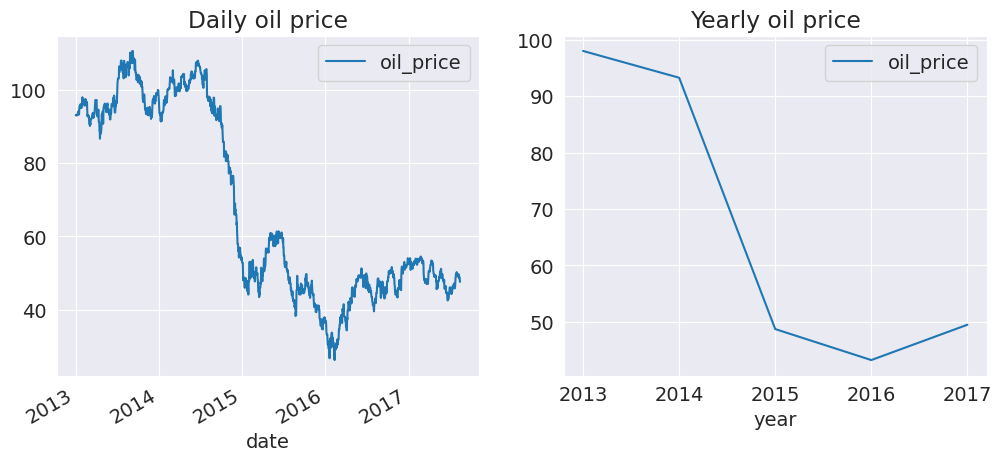

In [52]:
# plotting daily and yearly oil price
fig, axes = plt.subplots(1,2, figsize=(12,5))
date_oil_price.plot(ax=axes[0])
year_oil_price.plot(ax=axes[1])
axes[0].set_title("Daily oil price")
axes[1].set_title("Yearly oil price");


**Info**

- Oil prices were maximum in 2013 but there is a sharp decline in price in year 2015 and in 2016 the prices were minimum.

### 2. Sales per day




In [53]:
date_sales = merged_train_df.groupby('date')[['sales']].sum().reset_index()

In [54]:
# plotting The date vs sales  line plot w.r.t to year
px.line(date_sales, x ='date',y ='sales', title='line plot of date vs. sales')

**Info**

- we can see sales are growing year by year.

### 3. Sales by Store Type

In [55]:
store_type_sales = merged_train_df.groupby('store_type')['sales'].sum().reset_index()

In [56]:
# plotting sum of sales by store type
px.bar(store_type_sales, x='store_type', y='sales', title='Total sales by store type')

**Info**

- Store types 'A' and 'D' have similar sales.
- Store 'E' has minimum sale among all type of stores.

### 4. Monthly sales by store type

In [57]:
monthly_sales_store_type = merged_train_df.groupby(['year','month', 'store_type'])['sales'].sum()

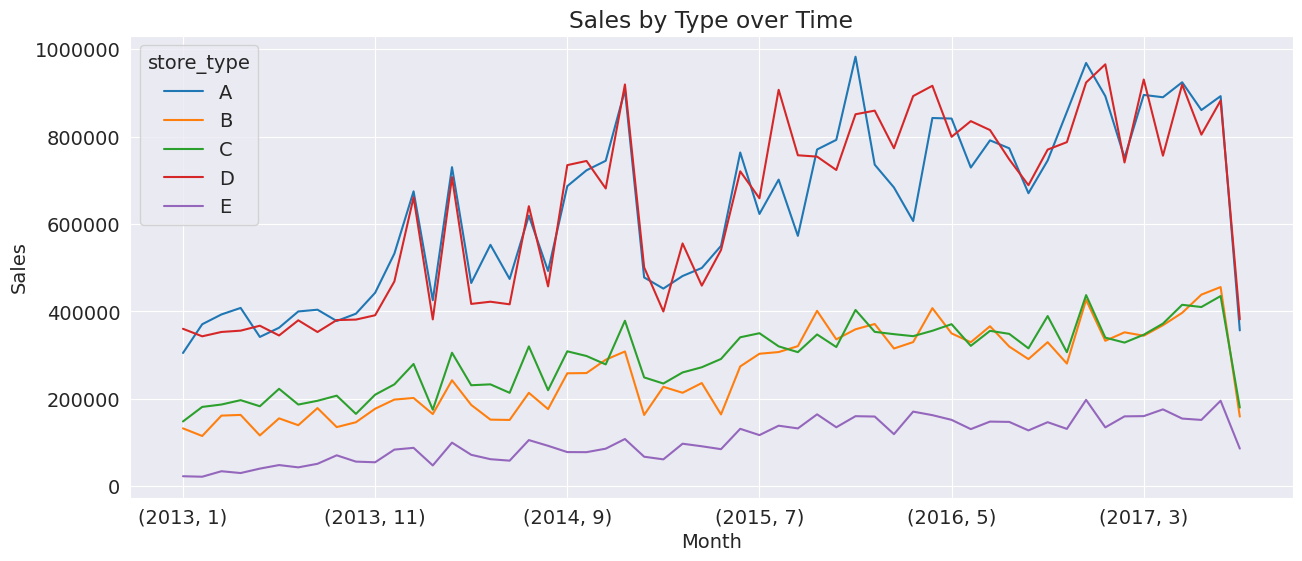

In [58]:
# Unstack 'type' to have types as columns
pivot_df = monthly_sales_store_type.unstack(level='store_type')

# Plot the time series for each type

pivot_df.plot()

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Type over Time')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Display the plot
plt.show()

**Info**

- A and D stores have same sales which are the highest sales among all types of stores
- E store type has least sales
- B and C has medium sales and similar sales growth

### 5. Sales by product family

In [59]:
sales_by_product = merged_train_df.groupby("family")["sales"].sum().sort_values(ascending=False).reset_index()

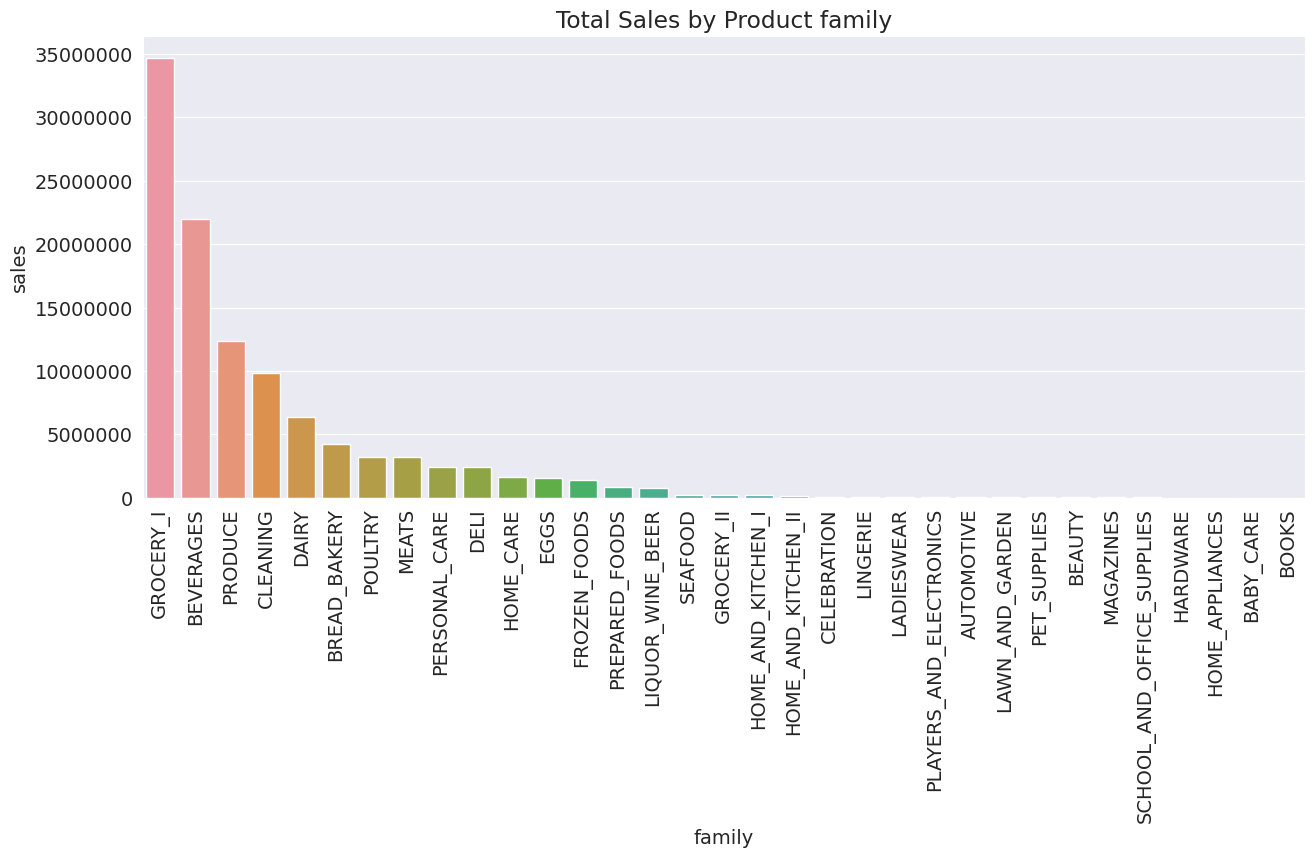

In [60]:
# plotting sales per product family
sns.barplot(data = sales_by_product, x ='family',y ='sales')
plt.title('Total Sales by Product family')
plt.xticks(rotation =90)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

**Info**

- Top 5 product families by sales are Grocery I, Beverages, Produce, Cleaning, and dairy respectively.

### 6. Monthly sales of each product family w.r.t. year

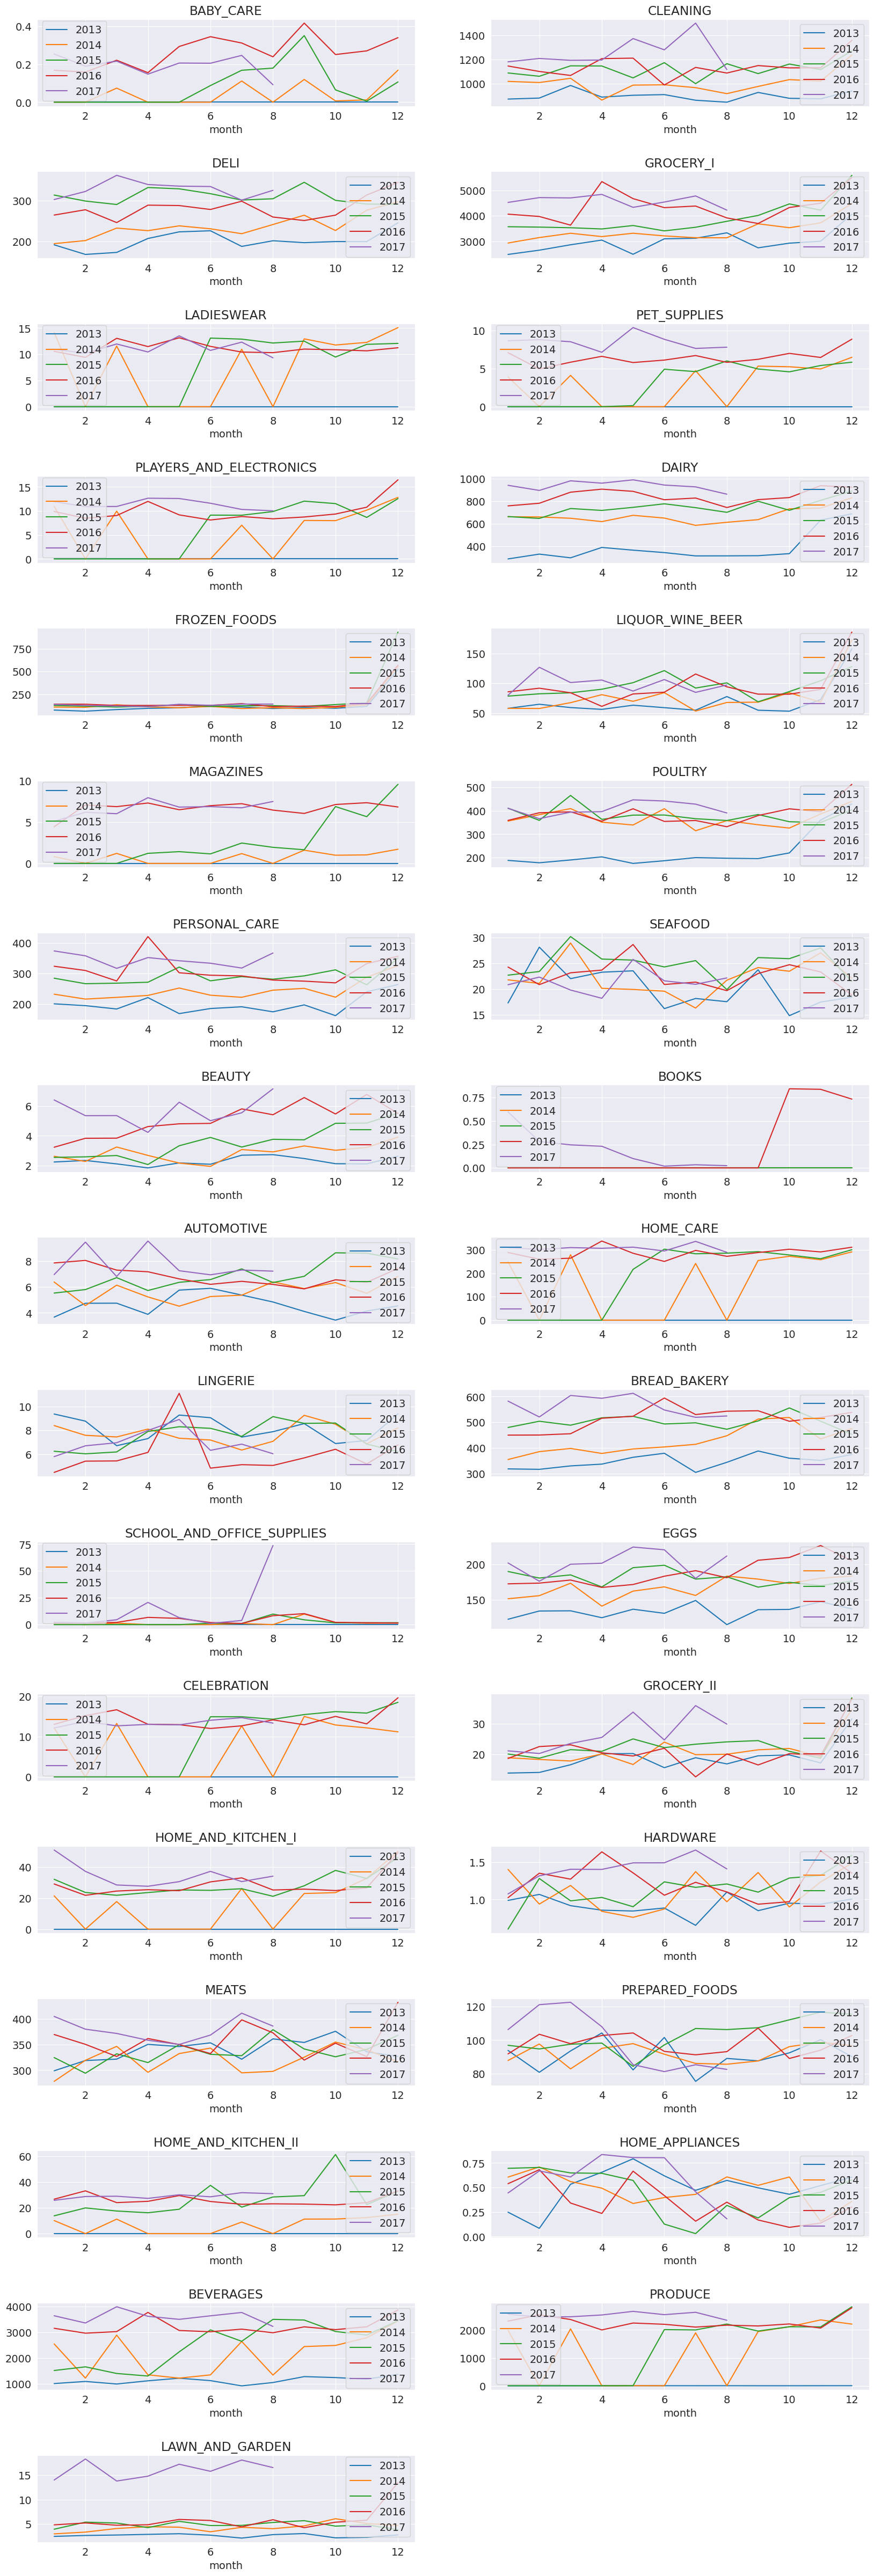

In [61]:
fig= plt.figure(figsize=(20,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(merged_train_df.family.unique()):
    ax = fig.add_subplot(33,2,i+1)
    select = merged_train_df.query('family==@product')
    for year in [2013,2014,2015,2016,2017]:
        select.query('year==@year').groupby('month').sales.mean().plot(ax=ax,label=year)
    plt.title(product)
    ax.legend();

### 7. Sales by Store Number

In [62]:
sales_by_store_no = merged_train_df.groupby("store_nbr")["sales"].sum().sort_values(ascending=False).reset_index()

In [63]:
# plotting total sales per store number
px.bar(sales_by_store_no, x = 'store_nbr', y='sales', title='Total sale per store by store number')


### 8. Number of stores in each city

In [64]:
stores_count_city = merged_train_df.groupby(['city', 'store_type']).count()[['store_nbr']].reset_index(level=0).reset_index(level=0)[['city', 'store_type', 'store_nbr']]

In [65]:
map_colors = {'A': '#96ceb4', 'B':'#ffeead', 'C':'#ffcc5c', 'D':'#ff6f69', 'E':'#ffff99'}
stores_count_city['colors'] = stores_count_city['store_type'].map(map_colors)

#SALES
trace= go.Bar(y=stores_count_city['store_nbr'],
              x=stores_count_city['city'],
              text = stores_count_city["store_type"],
              marker=dict(color= stores_count_city['colors']))

##styling
fig = go.Figure(data = trace)
fig.update_xaxes(visible=True)
fig.layout.update({'title': 'Number of Stores in each City by Type'})
fig.update_yaxes(showgrid=False)
fig.update_layout(title_x=0.5,
                  template="ggplot2",
                  bargap=0.4,
                  height=700,
                  width=800,
                  showlegend=False)

fig.show()

**Info**

- Maximum number of stores are in Quito supposedly because it is the capital city of Ecuador.
- Guayaquil is at the second number because it is the port city and economic capital of Ecuador.


### 9. Effect on sales due to earthquake

We have this note in data description

- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [66]:
merged_train_df['year_month'] = merged_train_df['date'].dt.to_period('M').astype(str)

# group by year-month and calculate average sales
avg_sales = merged_train_df.groupby('year_month')['sales'].mean()
avg_sales.index = pd.to_datetime(avg_sales.index)

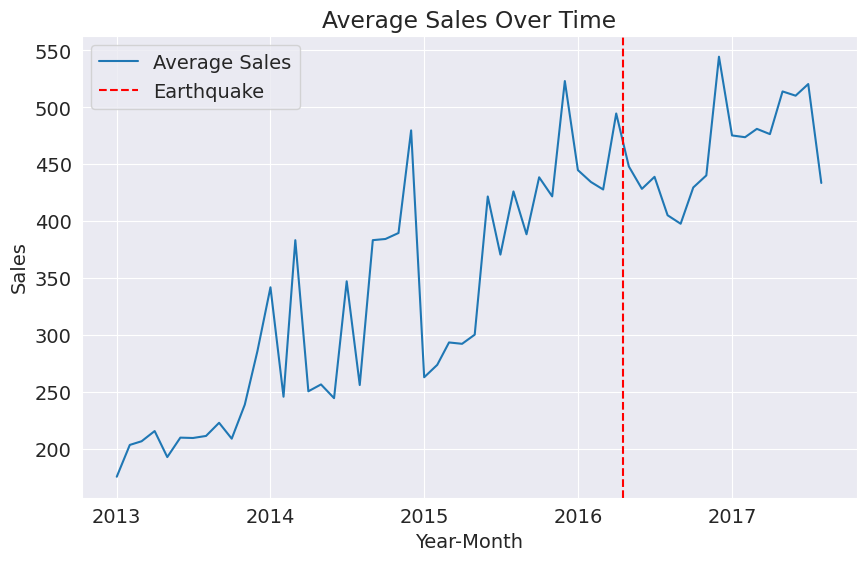

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(avg_sales.index, avg_sales.values, label='Average Sales')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Sales')
ax.set_title('Average Sales Over Time')

# add a vertical line for the earthquake in April 2016
ax.axvline(pd.to_datetime('2016-04-16'), color='r', linestyle='--', label='Earthquake')
ax.legend()

plt.show()

**Info**

- Sales dropped drastically after earthquake, after july it started to increse sales gradually.

## Prepare Dataset for Training

### Split Training and Validation Set

In [68]:
# Create training and validation set
training_df, val_df = train_test_split(merged_train_df, test_size=0.2, random_state=42)

In [69]:
training_df.shape, val_df.shape

((240603, 20), (60151, 20))

In [70]:
training_df.date.min(), training_df.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [71]:
val_df.date.min(), val_df.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

### Inputs and Target Columns

In [72]:
input_cols = ['family', 'onpromotion', 'city','state', 'store_type',
              'cluster', 'oil_price', 'day_type', 'locale']

target_cols = ['sales']

# Non Scaling cols
transferred= ['transferred']
store_nbr= ['store_nbr']
dates = ['year', 'month', 'week', 'quarter','day_of_week', ]

In [73]:
merged_train_df[input_cols].nunique()

family           33
onpromotion     254
city             22
state            16
store_type        5
cluster          17
oil_price      1027
day_type          4
locale            2
dtype: int64

In [74]:
train_inputs = training_df[input_cols + dates + store_nbr + transferred].copy()
train_targets = training_df[target_cols].copy()

In [75]:
val_inputs = val_df[input_cols + dates + store_nbr + transferred].copy()
val_targets = val_df[target_cols].copy()

In [76]:
test_inputs = merged_test_df[input_cols + dates + store_nbr + transferred].copy()
# Test data does not have targets

### Numeric and Categorical Columns

In [77]:
numeric_cols = merged_train_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = merged_train_df[input_cols].select_dtypes(include='object').columns.tolist()

### Scaling and One hot Encoding

In [78]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [79]:
# scaling
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [80]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [81]:
# one hot encoding
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Let's now extract numeric data

In [82]:
x_train = train_inputs[dates + store_nbr + transferred + numeric_cols + encoded_cols]
x_val = val_inputs[dates + store_nbr + transferred + numeric_cols + encoded_cols]
x_test = test_inputs[dates + store_nbr + transferred + numeric_cols + encoded_cols]

## Training Models

In [83]:
# defining a function for evaluation metrics
def eval_metrics(targets, pred):

  # Targets = Train targets or Val targets (train_targets / val_targets)
  # pred = model predicts

   rmsle = round(mean_squared_log_error(targets, pred, squared= False),3)

   return {'RMSLE': rmsle}

### Base Model

In [84]:
base_model1 = merged_train_df.groupby(['store_nbr','store_type']).sales.transform('median')
base_model2 = merged_train_df.groupby(['store_nbr','store_type']).sales.transform('mean')
print(eval_metrics(merged_train_df.sales, base_model1))
print(eval_metrics(merged_train_df.sales, base_model2))

{'RMSLE': 2.667}
{'RMSLE': 3.791}


### Linear Models

Linear Regression

In [85]:
linear_model= LinearRegression()
linear_model.fit(x_train, train_targets)

LinearRegression()

In [86]:
lm_train_preds = linear_model.predict(x_train)
lm_val_preds = linear_model.predict(x_val)

In [87]:
lm_train_preds[lm_train_preds<0]=0
eval_metrics(train_targets, lm_train_preds)

{'RMSLE': 2.426}

In [88]:
lm_val_preds[lm_val_preds<0]=0
eval_metrics(val_targets, lm_val_preds)

{'RMSLE': 2.418}

Ridge Regression

In [89]:
ridge_model = Ridge()
ridge_model.fit(x_train, train_targets)

Ridge()

In [90]:
rm_train_preds = ridge_model.predict(x_train)
rm_val_preds = ridge_model.predict(x_val)

In [91]:
rm_train_preds[rm_train_preds<0]=0
eval_metrics(train_targets, rm_train_preds)

{'RMSLE': 2.426}

In [92]:
rm_val_preds[rm_val_preds<0]=0
eval_metrics(val_targets, rm_val_preds)

{'RMSLE': 2.418}

SGD Regression

In [93]:
sgd_model = SGDRegressor()
sgd_model.fit(x_train, train_targets)

SGDRegressor()

In [94]:
sgdm_train_preds = sgd_model.predict(x_train)
sgdm_val_preds = sgd_model.predict(x_val)

In [95]:
sgdm_train_preds[sgdm_train_preds<0]=0
eval_metrics(train_targets, sgdm_train_preds)

{'RMSLE': 30.274}

In [96]:
sgdm_val_preds[sgdm_val_preds<0]=0
eval_metrics(val_targets, sgdm_val_preds)

{'RMSLE': 30.273}

SGD Model is way off from other linear models.

### Tree Based Models

Decision Tree

In [97]:
tree_model = DecisionTreeRegressor(random_state = 42)
tree_model.fit(x_train, train_targets)

DecisionTreeRegressor(random_state=42)

In [98]:
tree_train_preds = tree_model.predict(x_train)
tree_val_preds = tree_model.predict(x_val)

In [99]:
eval_metrics(train_targets, tree_train_preds)

{'RMSLE': 0.0}

In [100]:
eval_metrics(val_targets, tree_val_preds)

{'RMSLE': 0.722}

### Ensemble Models

Random Forest

In [101]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(x_train, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [102]:
rf_train_preds = rf.predict(x_train)
rf_val_preds = rf.predict(x_val)

In [103]:
eval_metrics(train_targets, rf_train_preds)

{'RMSLE': 0.462}

In [104]:
eval_metrics(val_targets, rf_val_preds)

{'RMSLE': 0.691}

In [105]:
rf_test_preds = rf.predict(x_test)
submission_df= pd.DataFrame({'id': merged_test_df.id, 'sales':rf_test_preds})
submission_df.to_csv('first_test_preds.csv',index=False)

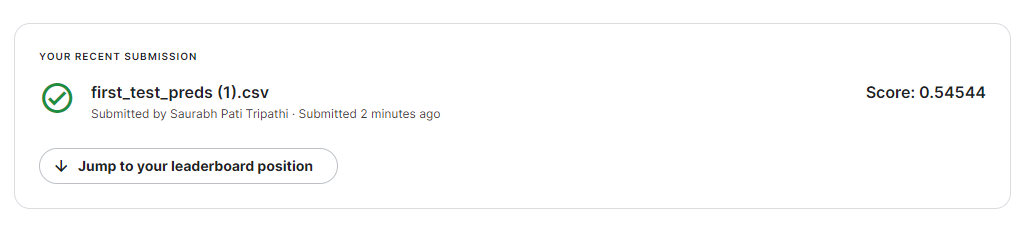

### Gradient Boosting

In [106]:
gb_model = XGBRegressor(max_depth=5, objective='reg:squaredlogerror', random_state=42, n_jobs=-1)
gb_model.fit(x_train, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             objective='reg:squaredlogerror', predictor=None, ...)

In [107]:
gb_train_preds = gb_model.predict(x_train)
gb_val_preds = gb_model.predict(x_val)
gb_train_preds[gb_train_preds<0]=0
gb_val_preds[gb_val_preds<0]=0

In [108]:
eval_metrics(train_targets, gb_train_preds)

{'RMSLE': 1.714}

In [109]:
eval_metrics(val_targets, gb_val_preds)

{'RMSLE': 1.703}

### Light GBM

In [110]:
lgbm_model = LGBMRegressor(boosting_type='gbdt',
                           num_leaves= 10000, learning_rate= 0.1,
                           max_depth= 10, n_estimators=100)
lgbm_model.fit(x_train,train_targets,
        eval_set=[(x_val, val_targets)],
        eval_metric='mse')
lgbm_train_preds = lgbm_model.predict(x_train, num_iteration=lgbm_model.best_iteration_)
lgbm_val_preds = lgbm_model.predict(x_val, num_iteration=lgbm_model.best_iteration_)

[1]	valid_0's l2: 1.12124e+06
[2]	valid_0's l2: 952048
[3]	valid_0's l2: 814173
[4]	valid_0's l2: 701987
[5]	valid_0's l2: 610734
[6]	valid_0's l2: 535516
[7]	valid_0's l2: 473784
[8]	valid_0's l2: 422356
[9]	valid_0's l2: 380922
[10]	valid_0's l2: 346135
[11]	valid_0's l2: 317260
[12]	valid_0's l2: 293254
[13]	valid_0's l2: 273716
[14]	valid_0's l2: 256711
[15]	valid_0's l2: 242562
[16]	valid_0's l2: 230946
[17]	valid_0's l2: 221052
[18]	valid_0's l2: 212724
[19]	valid_0's l2: 205312
[20]	valid_0's l2: 199316
[21]	valid_0's l2: 194240
[22]	valid_0's l2: 189548
[23]	valid_0's l2: 185988
[24]	valid_0's l2: 182884
[25]	valid_0's l2: 180466
[26]	valid_0's l2: 178014
[27]	valid_0's l2: 175871
[28]	valid_0's l2: 173630
[29]	valid_0's l2: 171971
[30]	valid_0's l2: 170404
[31]	valid_0's l2: 169068
[32]	valid_0's l2: 167921
[33]	valid_0's l2: 166586
[34]	valid_0's l2: 165251
[35]	valid_0's l2: 163870
[36]	valid_0's l2: 162993
[37]	valid_0's l2: 162169
[38]	valid_0's l2: 160965
[39]	valid_0's l

In [111]:
lgbm_train_preds[lgbm_train_preds<0]=0
lgbm_val_preds[lgbm_val_preds<0]=0

In [112]:
eval_metrics(train_targets, lgbm_train_preds)

{'RMSLE': 1.513}

In [113]:
eval_metrics(val_targets, lgbm_val_preds)

{'RMSLE': 1.513}

## Tune Hyperparameters

If we have more RAM we can define a function to tune hyperparameters by passing a list of parameter values and plot that on graph to know the best fit value. But, due to the unavailability of RAM, we will get the best parameter values by hit and trial method.

In [114]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(x_train, train_targets)
    train_rmsle = mean_squared_log_error(model.predict(x_train), train_targets, squared=False)
    val_rmsle = mean_squared_log_error(model.predict(x_val), val_targets, squared=False)
    return train_rmsle, val_rmsle

n_estimators

In [115]:
test_params(n_estimators=10)

(0.42803653868205255, 0.6709413747172687)

Max_depth

In [116]:
test_params(max_depth=40)

(0.48368410508501586, 0.6897865816643941)

Min_samples_split

In [117]:
test_params(min_samples_split=2)

(0.46235839132369866, 0.6909666524968051)

min_weight_fraction_leaf

In [118]:
test_params(min_weight_fraction_leaf=0.0)

(0.46235839132369866, 0.6909666524968051)

max_features

In [119]:
test_params(max_features=1.0)

(0.46235839132369866, 0.6909666524968051)

max_leaf_nodes

In [120]:
test_params(max_leaf_nodes=2**20)

(0.46118594657641604, 0.6897454673861307)

min_impurity_decrease

In [121]:
test_params(min_impurity_decrease=0.0)

(0.46235839132369866, 0.6909666524968051)

Training with the best hyperparameters

In [122]:
rf = RandomForestRegressor(random_state=42,
                           n_jobs=-1,
                           n_estimators=10,
                           max_depth=40,
                           min_samples_split=2,
                           min_weight_fraction_leaf=0.0,
                           max_features=1.0,
                           max_leaf_nodes=2**20,
                           min_impurity_decrease=0.0)
rf.fit(x_train, train_targets)

RandomForestRegressor(max_depth=40, max_leaf_nodes=1048576, n_estimators=10,
                      n_jobs=-1, random_state=42)

In [123]:
rf_train_preds = rf.predict(x_train)
rf_val_preds = rf.predict(x_val)

In [124]:
eval_metrics(train_targets, rf_train_preds)

{'RMSLE': 0.453}

In [125]:
eval_metrics(val_targets, rf_val_preds)

{'RMSLE': 0.668}

In [126]:
rf_test_preds = rf.predict(x_test)
sec_submission_df= pd.DataFrame({'id': merged_test_df.id, 'sales':rf_test_preds})
sec_submission_df.to_csv('second_test_preds.csv',index=False)

Even after tuning hyperparameters the test score only got slightly better. We are in the top 65 percent on the leaderboard.

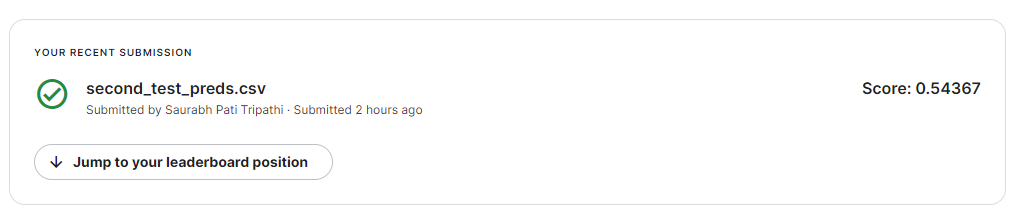

### Features Importance

In [127]:
rf_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

In [128]:
rf_importance_df

,feature,importance
22,family_GROCERY_I,0.30
13,family_BEVERAGES,0.12
81,store_type_A,0.10
5,store_nbr,0.09
7,onpromotion,0.08
...,...,...
88,day_type_Transfer,0.00
24,family_HARDWARE,0.00
11,family_BABY_CARE,0.00
27,family_HOME_APPLIANCES,0.00


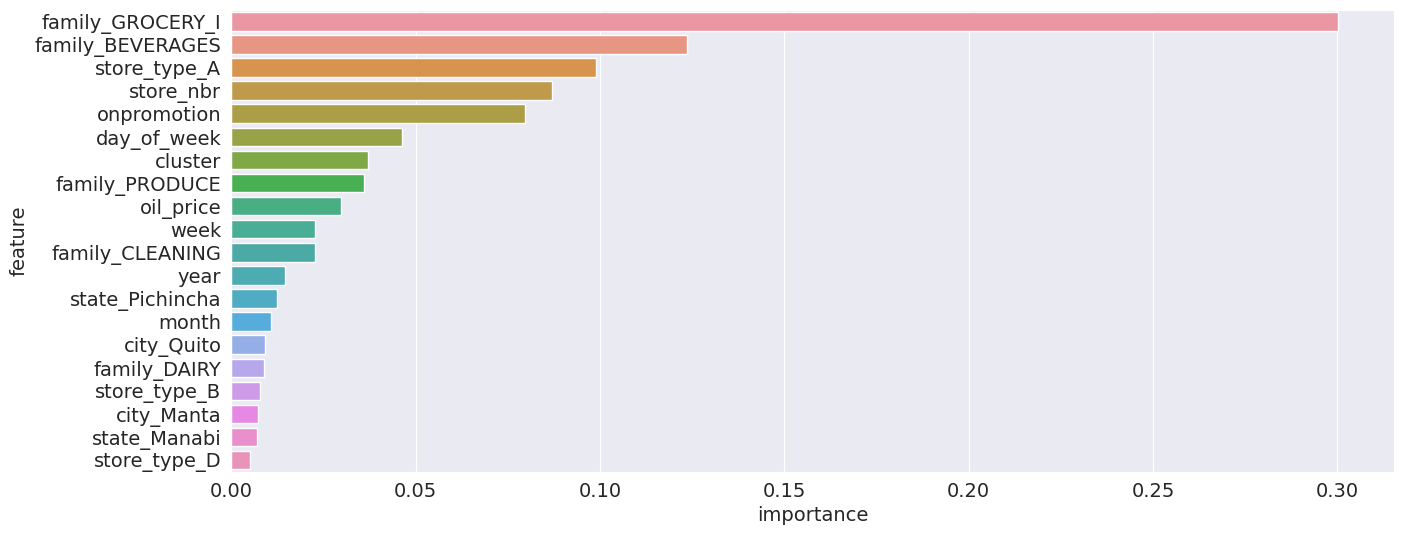

In [129]:
sns.barplot(data=rf_importance_df.head(20), x='importance', y='feature');

## Exponential weighted moving average

An exponentially weighted moving average (EWMA) is a type of moving average (MA) that gives more weight to recent observations and less weight to observations from the distant past. This type of moving average is commonly used in finance and economics to smooth out short-term fluctuations and to highlight longer-term trends or cycles.

The formula for the weighted moving average is as follows:

$$WM{A}_t = \frac{∑_{i=1}^n{w}_i.{x}_t - i + 1}{ ∑_{i=1}^n{w}_i}$$

Where,

$WM{A}_t$ = Weighted moving average at time

$t{x}_t$  = Value at time

$t{w}_i$  = Weight assigned to each value

$n$ = Number of values used to calculate the moving average

In [130]:
# Exponentially Weighted Average Features
def ewm_features(dataframe, alphas, lags):
    dataframe = dataframe.copy()
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["store_nbr", "family"])['sales']. \
                    transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

To create Exponentially weighted average features we have to merge data again from all the given datasets.

In [131]:
df_all = pd.concat([train_df, test_df])

df_all = df_all.merge(stores_df,left_on="store_nbr",right_on="store_nbr",how="left")

df_all = df_all.merge(holidays_df,left_on="date",right_on="date",how="left")

df_all = df_all.merge(oil_df,left_on='date',right_on='date',how='left')

df_all = df_all.replace(",","_",regex=True)


 Doing feature engineering to create new columns from date column

In [133]:
df_all['year'] = df_all['date'].dt.year
df_all['month'] = df_all['date'].dt.month
df_all['week'] = df_all['date'].dt.isocalendar().week
df_all['quarter'] = df_all['date'].dt.quarter
df_all['day_of_week'] = df_all['date'].dt.dayofweek

Changing datatypes to avoid error

In [134]:
df_all["store_nbr"] = df_all["store_nbr"].astype("category")
df_all["family"] = df_all["family"].astype("category")
df_all["onpromotion"] = df_all["onpromotion"].astype("int64")
df_all["city_x"] = df_all["city_x"].astype("category")#
df_all["state"] = df_all["state"].astype("category")#
df_all["store_type"] = df_all["store_type"].astype("category")#
df_all["day_type"] = df_all["day_type"].astype("category")
df_all["locale"] = df_all["locale"].astype("category")
df_all["city_y"] = df_all["city_y"].astype("category")#
df_all["transferred"] = df_all["transferred"].astype("category")
df_all['week'] = df_all['week'].astype(int)


In [135]:
# selecting columns
col = ['date','store_nbr','family','sales','onpromotion',
       'city_x', 'state', 'store_type', 'cluster', 'oil_price', 'day_type','locale',
       'city_y','transferred','year', 'month', 'week', 'quarter', 'day_of_week']

df = df_all[col]

In [136]:
alphas = [0.95, 0.9, 0.8, 0.5]
lags =[1, 6, 7, 8, 30]
df = ewm_features(df, alphas, lags)

In [137]:
df['sales'] = np.log1p(df["sales"].values) #Logarithmic Conversion

Splitting training, validation and test sets

In [138]:
#Train Test Split
val = df[(df["date"]>"2017-08-01")&(df["date"]<="2017-08-15")]
train  = df[df["date"]<="2017-08-01"]
test = df[df["date"]>"2017-08-15"]

col_X = [col for col in train.columns if col not in ['date', 'sales','year']]

y_train = train["sales"]
y_val = val["sales"]
X_train = train[col_X]
X_val = val[col_X]
X_test = test[col_X]
y_test = test["sales"]

In [139]:
# LightGBM parameters
lgb_params = {'metric': {'mse'},
              'boosting_type' : 'gbdt',
              'num_leaves': 8,
              'learning_rate': 0.2,
              #'feature_fraction': 0.8,
              'max_depth': 7,
              'verbose': 0,
              'num_boost_round': 5000,
              'early_stopping_rounds': 200,
              'nthread': -1,
             'force_col_wise':True}

lgbtrain = lgb.Dataset(data=X_train, label=y_train, feature_name=col_X)
lgbtest = lgb.Dataset(data=X_val, label=y_val, reference=lgbtrain, feature_name=col_X)

In [140]:
from sklearn.metrics import mean_absolute_error
model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbtest],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  verbose_eval=200)

Training until validation scores don't improve for 200 rounds
[200]	training's l2: 0.271774	valid_1's l2: 0.225543
[400]	training's l2: 0.235029	valid_1's l2: 0.225087
Early stopping, best iteration is:
[328]	training's l2: 0.246269	valid_1's l2: 0.215275


In [141]:
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)
y_pred_val[y_pred_val<0]=0
eval_metrics(np.expm1(y_val), np.expm1(y_pred_val))

{'RMSLE': 0.464}

Feature Importance

In [142]:
# Feature Importance
def plot_lgb_importances(model, plot=False, num=10):

    gain = model.feature_importance('gain')
    feature_imp = pd.DataFrame({'feature': model.feature_name(),
                             'split': model.feature_importance('split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feature_imp[0:25])
        plt.title('Important Features')
        plt.tight_layout()
        plt.show()
    else:
        print(feature_imp.head(num))

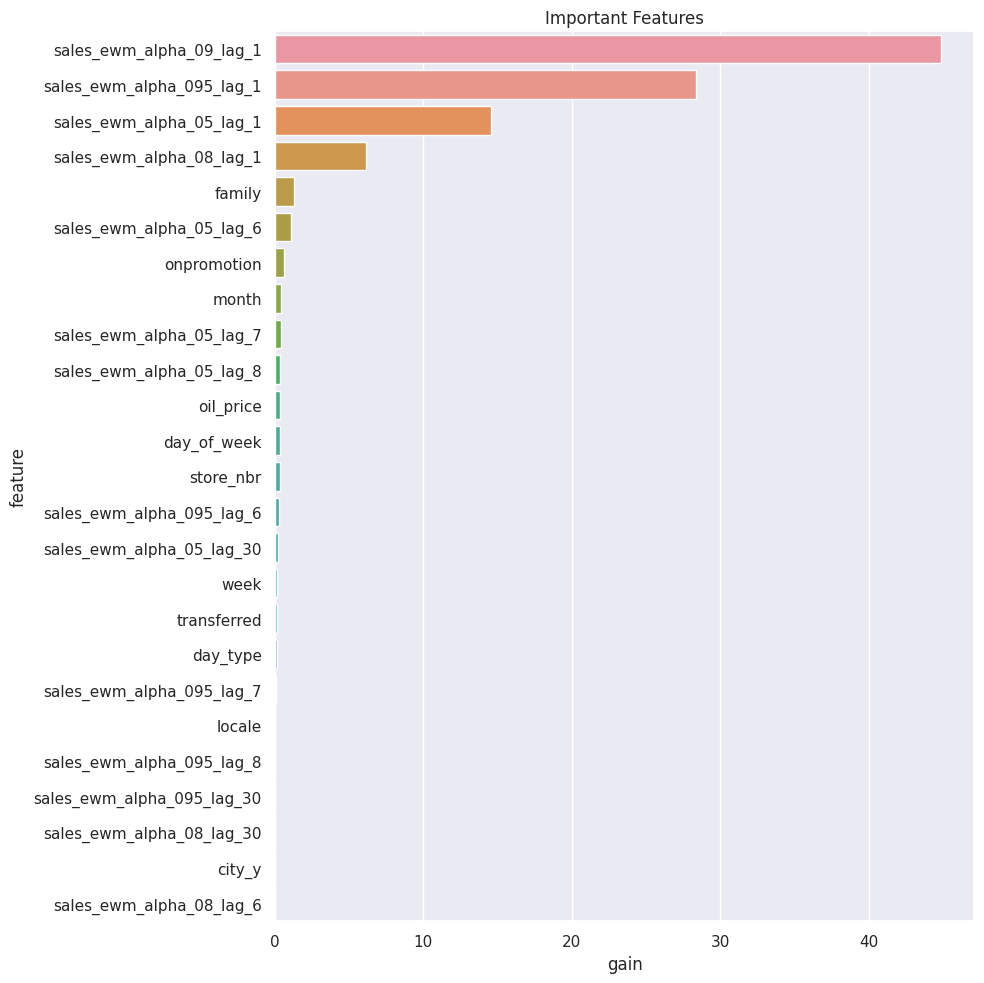

In [143]:
plot_lgb_importances(model, plot=True)

Final Submission

In [144]:
submission = pd.read_csv("./store-sales-time-series-forecasting/sample_submission.csv")
y_test = model.predict(X_test, num_iteration=model.best_iteration)
y_test[y_test<0]=0
submission["sales"] = np.expm1(y_test)

In [145]:
submission.to_csv("final_submission.csv",index=False)
submission

,id,sales
0,3000888,4.29
1,3000889,0.00
2,3000890,3.74
3,3000891,"2,143.32"
4,3000892,0.29
...,...,...
28507,3029395,300.89
28508,3029396,81.68
28509,3029397,"1,044.17"
28510,3029398,25.60


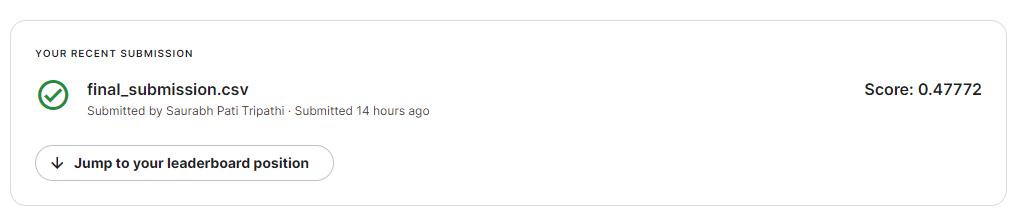

Now we are in top 33% on the leaderboard.

### Saving the best model

In [148]:
import joblib

sales_forecast_ema = {
    'LightGBM_model': model,
    'input_cols': X_train.columns,
    'target_col': 'sales'}

joblib.dump(sales_forecast_ema, 'sales_forecast_ema.joblib')


['sales_forecast_ema.joblib']

## Summary and Conclusion

This project dataset has 30M+ reocrds. Changed the datatypes of each column to reduce size of the file.

The linear models didn't perform well on the other hand DecisionTree and Random Forest remembered the training data as it is, after tuning the results for Random Forest it imporved a slightly. The Exponential Moving Average strategy had the most impact in model training among the other models. The results improved by applying EMA strategy and scored at Top 33% in Kaggle public leaderboard.

Date Features also had an impact on predicting sales, especially the month and day_of_week column.

Base Model (Median & Mean):
The private score for the Base model was 2.67 & 3.79

Random Forest Regressor:
The public leaderboard score for the DecisionTree model was 0.54

Exponential Moving Average:
The public leaderboard score for the EMA was 0.47


## Future Work

- Training with some more models and tuning them like Lasso
- Optimal Hyperparameter tuning for example with RandomSearchCV or GridSearch
- Features from the target variable such as lag,aggregrate, rolling stats since we have time-series data


## References

**Documentation**

- Scikit Learn Supervised Learning [Doc](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

- Light GBM [Doc](https://lightgbm.readthedocs.io/en/latest/)

- XGBoost [Doc](https://xgboost.readthedocs.io/en/latest/)

**Tutorials**

- How to approach Machine Learning Problems
[Jovian Aakash N S](https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems)

- Exponential Moving Average: [Video](https://www.youtube.com/watch?v=Kt-6PfYg_II&feature=youtu.be)

**Blogs and Kaggle Kernels**
- Store sales time series forecasting, Pratulofficialthings [Link](https://jovian.com/pratulofficialthings/store-sales-time-series-forecasting?username=pratulofficialthings&params=store-sales-time-series-forecasting)

- Walmart Store Sales Forecasting, Anushree: [Link](https://jovian.com/anushree-k/final-walmart-simple-rf-gbm#C228)

- EDA on sales forecasting, Sumeet__07 [Link](https://www.kaggle.com/code/sumeet07/eda-on-sales-forcasting)

- Store sales TS Forecasting, Ekrem Bayar [Link](https://www.kaggle.com/code/ekrembayar/store-sales-ts-forecasting-a-comprehensive-guide/notebook#8.-Did-Earhquake-affect-the-store-sales?)

**Queries**

- StackOverflow, GeekforGeeks